參考資料：
1. https://morvanzhou.github.io/tutorials/machine-learning/keras/3-1-save/

In [1]:
import numpy as np
# np.random.seed(1337)  # for reproducibility
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

E:\Anaconda3\envs\TF-Ke\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model_name = 'model_2_e20_.h5'

In [4]:
dataSetName = "mnist-pria-awgn_snr=10.npz"
f = np.load(dataSetName)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']

In [5]:
model = load_model('model_2_e20_.h5')

In [6]:
x_test = x_test.reshape(10000, 784).astype('float32') / 255 -0.5
# x_test /= 255
# x_test -= 0.5
print(x_test.shape, 'test samples')

(10000, 784) test samples


In [7]:
decodeImg = model.predict(x_test)

In [8]:
decodeImg = (decodeImg + 0.5) * 255

In [9]:
decodeImg = np.reshape(decodeImg, (decodeImg.shape[0], 28, 28))

In [10]:
img0 = decodeImg[0]
for i in range(1, 20):
    img1 = decodeImg[i]
    img0 = np.hstack((img0, img1))

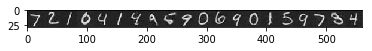

In [11]:
plt.imshow(img0, cmap = "gray")
plt.savefig(model_name.split(".")[0] + ".png")
plt.show()